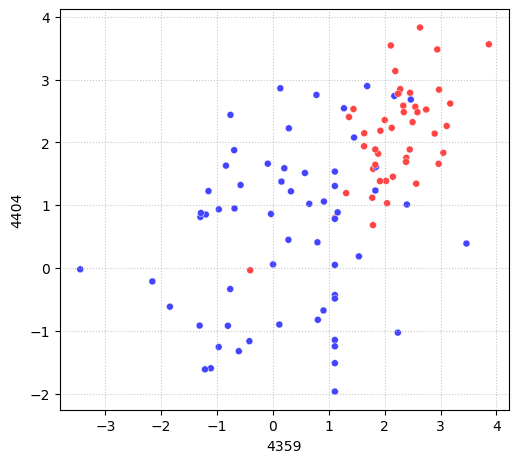

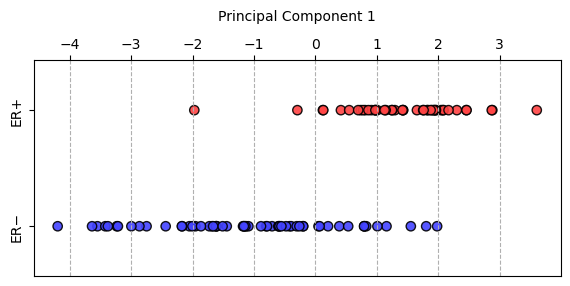

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip
import numpy as np

sample_groups = pd.read_csv("data/class.tsv", names=["Category"]).squeeze()

gene_reference = pd.read_csv("data/columns.tsv.gz", sep="\t", comment="#")
target_genes = gene_reference[gene_reference["GeneSymbol"].isin(["XBP1", "GATA3"])]
gene_codes = target_genes["ID"].astype(str).tolist()

with gzip.open("data/filtered.tsv.gz", "rt") as file:
    expr_data = pd.read_csv(file, delimiter="\t")
expr_data.columns = [col.strip() for col in expr_data.columns]

gene_plot_data = expr_data[gene_codes]
gene_plot_data.columns = {"XBP1": gene_plot_data.columns[0], 
                         "GATA3": gene_plot_data.columns[1]}.values()

plt.figure(figsize=(5.8, 5.2))
color_scheme = np.where(sample_groups == 1, "#FF4444", "#4444FF")
plt.scatter(gene_plot_data.iloc[:,0], gene_plot_data.iloc[:,1], 
            c=color_scheme, s=25, edgecolor="white", linewidth=0.3)
plt.xlabel(gene_plot_data.columns[0], fontsize=10)
plt.ylabel(gene_plot_data.columns[1], fontsize=10)
plt.grid(linestyle=":", alpha=0.7)
plt.show()

pca_model = PCA(n_components=1)
pc_results = pca_model.fit_transform(gene_plot_data)

plt.figure(figsize=(6.8, 2.8))
y_positions = sample_groups.replace(0, 0.15).replace(1, 0.85)
plt.scatter(pc_results[:,0], y_positions, c=color_scheme, 
            alpha=0.9, edgecolor="black", s=45)
plt.yticks([0.15, 0.85], ["ER−", "ER+"], rotation=90, va="center")
plt.ylim(-0.15, 1.15)
plt.gca().xaxis.set_ticks_position("top")
plt.xlabel("Principal Component 1", labelpad=12)
plt.gca().xaxis.set_label_position("top")
plt.grid(axis="x", linestyle="--")
plt.show()
